## 주성분 분석 (Principal Component Analysis, PCA)
<b><br>
- 비지도 선형 변환 기법
- 데이터 셋에 있는 분산이 최대인 직교 성분 축을 찾음
- 고차원 데이터에서 분산이 가장 큰 방향을 찾고 좀 더 작거나 같은 수의 차원을 갖는 새로운 부분 공간으로 이를 투영
 
    </b>

### PCA 알고리즘

[주성분 추출단계: 1~4]
1. d차원 데이터셋을 표준화 전처리한다.
2. 공분산 행렬(covariance matrix)를 만든다.
3. 공분산 행렬을 고유 벡터(eigenvector)와 고윳값(eigenvalue)로 분해한다.
4. 고윳값을 내림차순으로 정렬하고 그에 해당하는 고유벡터의 순위를 매긴다

[특성변환 단계: 5~7]

5. 고윳값이 가장 큰 k개의 고유 벡터를 선택한다. 여기서 k는 새로운 특성 부분 공간의 차원이다.(k<=d)
6. 최상위 k개의 고유 벡터로 투영 행렬(projection matrix) W를 만든다.
7. 투영 행렬 W를 사용하여 d차원 입력 데이터셋 X를 새로운 k 차원의 특성 부분 공간으로 변환한다.

In [1]:
import pandas as pd
df_wine = pd.read_csv("C:/Users/LG/Desktop/2021/여름방학/MachineLearningTextbook/wine.data.txt")

<b>단계 1) 데이터셋 표준화 전처리</b>

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
X,y = df_wine.iloc[:,1:].values, df_wine.iloc[:,0].values
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)#훈련 세트와 테스트 세트 나눔

#표준화 전처리
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

<b>단계 2) 공분산 행렬 만들기</b>

In [6]:
cov_mat = np.cov(X_train_std.T)#공분산 행렬

<b>단계 3) 공분산 행렬을 고유벡터와 고윳값으로 분해</b>

In [7]:
eigen_vals,eigen_vecs = np.linalg.eig(cov_mat)

In [8]:
print("고윳값",eigen_vals)

고윳값 [4.79500219 2.50003078 1.44306678 0.99901271 0.87517717 0.67821564
 0.53031813 0.35080209 0.28446498 0.11333093 0.14810971 0.18968162
 0.19934466]


In [9]:
print("고유 벡터",eigen_vecs)

고유 벡터 [[ 0.12221148  0.49927666 -0.12829383 -0.01136017 -0.35962533  0.23048312
   0.04714035 -0.39450917 -0.37873538  0.10409129 -0.07349869  0.45755259
  -0.09926907]
 [-0.24391049  0.15419073  0.1337824   0.54699739 -0.01698596  0.60977103
  -0.35388209 -0.03230253  0.07247366 -0.03035566  0.05093259 -0.29983979
  -0.05071359]
 [ 0.00369454  0.25170137  0.68792836 -0.23900517 -0.05336737  0.09514094
   0.13810458  0.11452347  0.42213357 -0.08005053 -0.03823149  0.18581102
  -0.37627553]
 [-0.249647   -0.12269609  0.59377246  0.00821015  0.0239095  -0.08118367
   0.20497479 -0.38757845 -0.33788462  0.0565922  -0.06769449 -0.12717355
   0.48215182]
 [ 0.13011026  0.31420427  0.08497154 -0.2395333   0.78023056  0.09478221
  -0.28258535  0.07484282 -0.29483288  0.05231238  0.14339912  0.07323052
   0.03102063]
 [ 0.39099441  0.05595656  0.19268611  0.19038516 -0.14478068 -0.08777222
  -0.09820019  0.39221599 -0.37290376 -0.53850843 -0.37707533 -0.06214601
   0.0581313 ]
 [ 0.41649235 -0

In [11]:
tot = sum(eigen_vals)#고윳값 합

In [14]:
#설명된 분산
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]#내림차순(큰->작)
var_exp

[0.36584757147541014,
 0.19074656393406986,
 0.11010265583784805,
 0.07622235775294409,
 0.06677399296512859,
 0.05174628422400787,
 0.040462046149778885,
 0.02676538801093347,
 0.02170401974094434,
 0.015209536025670826,
 0.014472268465673664,
 0.011300427894675787,
 0.00864688752291444]

In [15]:
cum_var_exp = np.cumsum(var_exp)#설명된 분산의 누적값
cum_var_exp

array([0.36584757, 0.55659414, 0.66669679, 0.74291915, 0.80969314,
       0.86143943, 0.90190147, 0.92866686, 0.95037088, 0.96558042,
       0.98005268, 0.99135311, 1.        ])

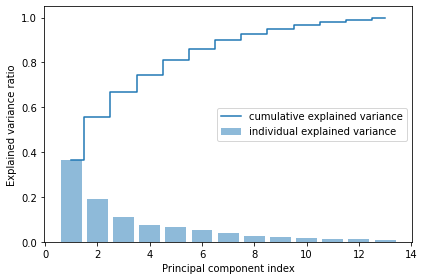

In [17]:
#주성분의 설명된 분산
import matplotlib.pyplot as plt
plt.bar(range(1,14),var_exp,alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1,14),cum_var_exp,where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')#알아서 찾아주는건가? 최적의 자리를?
plt.tight_layout()
plt.show()

<b> 단계 4) 고윳값을 내림차순으로 정렬하고 그에 해당하는 고유벡터의 순위를 매긴다</b>

In [18]:
#(고윳값, 고유벡터) 튜플의 리스트를 만든다
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]

#높은 값에서부터 낮은 값으로(내림차순으로) 튜플(고윳값,고유벡터) 고육값 기준으로 정렬한다
eigen_pairs.sort(key= lambda k:k[0],reverse=True)

In [21]:
eigen_pairs[:3]

[(4.795002186796571,
  array([ 0.12221148, -0.24391049,  0.00369454, -0.249647  ,  0.13011026,
          0.39099441,  0.41649235, -0.31569983,  0.2982478 , -0.07304049,
          0.31641846,  0.37253046,  0.29514562])),
 (2.5000307846768703,
  array([ 0.49927666,  0.15419073,  0.25170137, -0.12269609,  0.31420427,
          0.05595656, -0.02637354,  0.07362469, -0.01094724,  0.53961007,
         -0.21061646, -0.23649287,  0.38598117])),
 (1.4430667761042566,
  array([-0.12829383,  0.1337824 ,  0.68792836,  0.59377246,  0.08497154,
          0.19268611,  0.17557319,  0.14144693,  0.10831831, -0.04566347,
          0.03375899,  0.15215839, -0.08087437]))]

<b>단계 5) 고윳값이 가장 큰 k개의 고유 벡터를 선택한다. 여기서 k는 새로운 특성 부분 공간의 차원이다.(k<=d)</b>

<b>단계 6) 최상위 k개의 고유 벡터로 투영 행렬(projection matrix) W를 만든다.</b>

In [24]:
print(eigen_pairs[0])
print(eigen_pairs[0][1])

(4.795002186796571, array([ 0.12221148, -0.24391049,  0.00369454, -0.249647  ,  0.13011026,
        0.39099441,  0.41649235, -0.31569983,  0.2982478 , -0.07304049,
        0.31641846,  0.37253046,  0.29514562]))
[ 0.12221148 -0.24391049  0.00369454 -0.249647    0.13011026  0.39099441
  0.41649235 -0.31569983  0.2982478  -0.07304049  0.31641846  0.37253046
  0.29514562]


In [25]:
#여기선 두 개의 고유 벡터 선택
w = np.hstack((eigen_pairs[0][1][:,np.newaxis],eigen_pairs[1][1][:,np.newaxis]))#새로로 쌓기

In [26]:
print("투영 행렬:\n",w)

투영 행렬:
 [[ 0.12221148  0.49927666]
 [-0.24391049  0.15419073]
 [ 0.00369454  0.25170137]
 [-0.249647   -0.12269609]
 [ 0.13011026  0.31420427]
 [ 0.39099441  0.05595656]
 [ 0.41649235 -0.02637354]
 [-0.31569983  0.07362469]
 [ 0.2982478  -0.01094724]
 [-0.07304049  0.53961007]
 [ 0.31641846 -0.21061646]
 [ 0.37253046 -0.23649287]
 [ 0.29514562  0.38598117]]


<b>단계 7) 투영 행렬 W를 사용하여 d차원 입력 데이터셋 X를 새로운 k 차원의 특성 부분 공간으로 변환한다.</b>

In [28]:
X_train_pca = X_train_std.dot(w)

In [31]:
X_train_pca[:5]#pca

array([[-3.60252556,  1.65534122],
       [ 1.95604795,  1.82561351],
       [ 2.53103837,  1.06863621],
       [ 1.47797293,  0.71793527],
       [-3.90146552,  0.40145293]])

In [32]:
X_train_std[:5]#원본

array([[ 0.1937094 ,  2.37977151, -0.20420766,  0.7516873 , -0.37917036,
        -0.90757407, -1.37745448,  2.00281197, -0.08550407,  1.17204713,
        -1.5782345 , -1.64200771, -0.08460637],
       [ 0.92207682, -0.70975882,  1.25077192, -0.03264879,  2.61733743,
         1.06316198,  0.71546023,  1.10044614, -0.436656  ,  0.11881796,
         1.40544599,  0.55879351,  1.47960155],
       [ 0.88504119, -0.73508284,  1.25077192,  0.90855452,  0.2354979 ,
         1.14459736,  1.22133061, -0.62225227,  1.37177644,  0.24520546,
         1.13002933,  0.1389038 ,  1.63295526],
       [ 0.61344656, -0.48184265,  1.05932724, -0.189516  ,  0.9269997 ,
         0.08593749,  0.50716066, -0.62225227, -0.10306166, -0.38673205,
         0.71690434,  0.37056709,  1.05021114],
       [-0.59638407,  2.64989439,  1.0210383 ,  1.6928906 , -0.14866976,
        -0.8261387 , -1.40721156,  2.16687849, -0.87559591, -0.04969871,
        -0.56837341, -1.33794965, -0.72869198]])

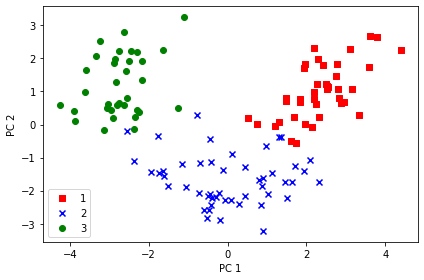

In [34]:
#차원 축소된 Wine 데이터셋의 산점도
colors = ['r','b','g']
markers = ['s','x','o']
for l, c, m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_pca[y_train==l,0],X_train_pca[y_train==l,1],c=c,label=l,marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

#### 사이킷런의 주성분 분석

In [41]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,resolution=0.02):#결정경계그리기
    #마커와 컬러맵을 준비
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #결정경계 그리기
    x1_min, x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    
    Z= classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #클래스 샘플 표시
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.6,c=cmap.colors[idx],edgecolor='black',marker=markers[idx],label=cl)
    
    

<ipython-input-41-6e4e2590a161>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.6,c=cmap.colors[idx],edgecolor='black',marker=markers[idx],label=cl)


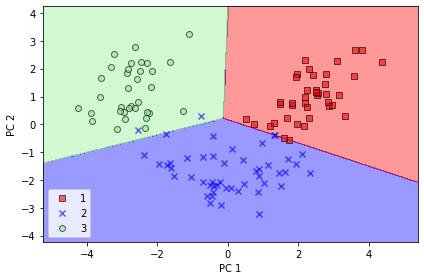

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)#2개의 주성분

#사이킷런의 pca클래스를 훈련세트에 적용
X_train_pca = pca.fit_transform(X_train_std)#PCA 변환
X_test_pca = pca.transform(X_test_std)
lr = LogisticRegression(solver='liblinear',multi_class='auto')
lr.fit(X_train_pca,y_train)
plot_decision_regions(X_train_pca,y_train,classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

<ipython-input-41-6e4e2590a161>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.6,c=cmap.colors[idx],edgecolor='black',marker=markers[idx],label=cl)


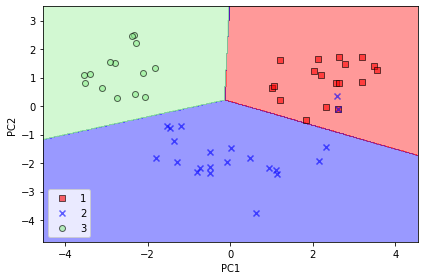

In [43]:
#테스트세트의 결정경계
plot_decision_regions(X_test_pca,y_test,classifier=lr)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [44]:
#전체 주성분의 설명된 분산(explained variance) 비율 확인
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_#설명된 분산 비율

array([0.36584757, 0.19074656, 0.11010266, 0.07622236, 0.06677399,
       0.05174628, 0.04046205, 0.02676539, 0.02170402, 0.01520954,
       0.01447227, 0.01130043, 0.00864689])

## 선형 판별 분석 (Linear Discriminant Analysis, LDA)
<b><br>
- 사용: 지도학습 알고리즘, 규제가 없는 모델에서 과대적합 줄이기 위해 활용
- 목표: 클래스를 최적으로 구분할 수 있는 특성 부분 공간을 찾는 것
    </b>

### LDA 알고리즘

1. d차원 데이터셋을 표준화 전처리한다.(d: 특성 개수)
2. 각 클래스에 대해 d차원의 평균 벡터를 계산(지도학습; 클래스 레이블 정보 사용)
3. 클래스 간의 산포 행렬(scatter matrix) $S_b$와 클래스 내 산포 행렬 $S_w$를 구성한다.
4. $S_w^{-1}S_b$ 행렬의 고유 벡터와 고윳값을 계산한다.
5. 고윳값을 내림차순으로 정렬하여 고유벡터의 순서를 매긴다.
6. 고윳값이 가장 큰 k개의 고유 벡터를 선택하여 $d$x$k$ 차원의 변환행렬 $W$를 구성한다. 이 행렬의 열이 고유 벡터다.
7. 변환 행렬 $W$를 사용하여 샘플을 새로운 특성 부분 공간으로 투영한다.

<b>단계 1) 표준화 전처리 </b>

In [47]:
X_train_std
X_test_std
print()

<b>단계 2) 각 클래스에 대해 d차원의 평균 벡터를 계산</b>

$$m_i = \frac{1}{n_i}\sum_{x \in D_i}^{} x_{m}$$

$$\begin{equation*}
m_i = 
\begin{bmatrix}
\mu_{i,malcohol} \\
\mu_{i,malic acid} \\
.\\
.\\
.\\
\mu_{i,proline}
\end{bmatrix}
\end{equation*}$$<br>
$$ i \in {1,2,3} (클래스)$$

In [50]:
np.set_printoptions(precision=4)#소수점 4자리수까지 출력

In [51]:
mean_vecs = []#평균벡터
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[y_train==label],axis=0))
    print('MV %s: %s\n'%(label,mean_vecs[label-1]))#클래스 label에 대한 특성 개수 차원 평균 벡터

MV 1: [ 0.8807 -0.3428  0.2687 -0.8193  0.4718  0.8881  0.9597 -0.6325  0.4794
  0.2394  0.5838  0.6963  1.2367]

MV 2: [-0.8811 -0.2894 -0.3636  0.3329 -0.398  -0.0317  0.0938 -0.0514  0.137
 -0.8377  0.3394  0.3511 -0.7462]

MV 3: [ 0.2336  0.8204  0.208   0.4841  0.0186 -0.9991 -1.2643  0.8182 -0.7615
  0.9256 -1.1759 -1.3252 -0.3796]



<b>단계 3) 클래스 간의 산포 행렬(scatter matrix)  $S_𝑏$ 와 클래스 내 산포 행렬  $S_W$ 를 구성한다.</b>

#### 클래스 내 산포 행렬 $S_W$
$$S_W = \sum_{i=1}^{c} S_{i} $$

#### 개별 클래스 i의 산포랭렬 $S_i$
$$S_i = \sum_{x \in D_i}^{} (x-m_i)(x-m_i)^{T}$$

In [53]:
#클래스 내 산포행렬(S_W)
d=13#특성 개수
S_W = np.zeros((d,d))
for label,mv in zip(range(1,4),mean_vecs):
    class_scatter = np.zeros((d,d))
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d,1),mv.reshape(d,1)
        class_scatter += (row-mv).dot((row-mv).T)#개별 클래스 산포 행렬
    S_W += class_scatter

In [54]:
print("클래스 내의 산포 행렬: %sx%s"%(S_W.shape[0],S_W.shape[1]))

클래스 내의 산포 행렬: 13x13


In [56]:
print("클래스 레이블 분포: %s"%np.bincount(y_train)[1:] )#클래스 레이블 개수 불균등하게 분포되어있음

클래스 레이블 분포: [40 49 34]


#### 산포 행렬의 정규화버전(스케일 조정)

$$\sum\nolimits_{i}=\frac{1}{n}\sum_{x \in D_i}^{} (x-m_i)(x-m_i)^{T}$$

$n$: 샘플 개수

In [57]:
d = 13#클래스 개수
S_W = np.zeros((d,d))
for label, mv in zip(range(1,4),mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T, bias=True)#공분산행렬(=산포행렬의 정규화버전)
    S_W += class_scatter

In [58]:
print("스케일 조정된 클래스 내의 산포 행렬: %sx%s"%(S_W.shape[0],S_W.shape[1]))

스케일 조정된 클래스 내의 산포 행렬: 13x13


#### 클래스 간의 산포행렬 $S_B$
$$S_B = \sum_{i=1}^{c} n_i(m_i - m)(m_i - m)^{T}$$
$m$: 모든 클래스의 샘플을 포함하여 계산된 전체 평균

In [59]:
#클래스 간 산포행렬(S_B) 계산
mean_overall = np.mean(X_train_std, axis = 0)#전체평균(m)
mean_overall = mean_overall.reshape(d,1)#열(column) 벡터로 만들기
d=13
S_B = np.zeros((d,d))
for i, mean_vec in enumerate(mean_vecs):
    n= X_train[y_train == i+1,:].shape[0]#샘플 개수(n_i)
    mean_vec = mean_vec.reshape(d,1)#열 벡터로 만들기
    S_B += n*(mean_vec-mean_overall).dot((mean_vec - mean_overall).T)
    
print("클래스 간의 산포행렬: %sx%s"%(S_B.shape[0],S_B.shape[1]))

클래스 간의 산포행렬: 13x13


<b> 단계 4) $S_w^{-1}S_b$ 행렬의 고유 벡터와 고윳값을 계산한다.</b>

In [60]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [61]:
eigen_pairs = [(np.abs(eigen_vals[i]),eigen_vecs[:,i]) for i in range(len(eigen_vals))]

<b> 단계 5) 고윳값을 내림차순으로 정렬하여 고유벡터의 순서를 매긴다.</b>

In [63]:
eigen_pairs = sorted(eigen_pairs, key = lambda k:k[0],reverse=True)#내림차순으로 정렬하여 고유벡터 순서 매김

In [64]:
print("내림차순의 고윳값:\n")
for eigen_Val in eigen_pairs:
    print(eigen_Val[0])

내림차순의 고윳값:

376.5697714155991
167.6866436287072
5.49693732372873e-14
2.0081048210495743e-14
1.939052813682953e-14
1.939052813682953e-14
1.3961261084659713e-14
1.3961261084659713e-14
8.85307418992304e-15
8.85307418992304e-15
2.3475938490245313e-15
5.5406692513625854e-17
0.0


고윳값의 내림차순으로 선형 판별 벡터 그리기

In [68]:
eigen_vals

array([ 0.0000e+00+0.0000e+00j,  1.6769e+02+0.0000e+00j,
        3.7657e+02+0.0000e+00j,  5.4969e-14+0.0000e+00j,
       -2.0081e-14+0.0000e+00j, -8.8905e-15+1.7232e-14j,
       -8.8905e-15-1.7232e-14j,  1.3768e-14+2.3167e-15j,
        1.3768e-14-2.3167e-15j,  4.8017e-15+7.4378e-15j,
        4.8017e-15-7.4378e-15j,  5.5407e-17+0.0000e+00j,
        2.3476e-15+0.0000e+00j])

In [67]:
eigen_vals.real

array([ 0.0000e+00,  1.6769e+02,  3.7657e+02,  5.4969e-14, -2.0081e-14,
       -8.8905e-15, -8.8905e-15,  1.3768e-14,  1.3768e-14,  4.8017e-15,
        4.8017e-15,  5.5407e-17,  2.3476e-15])

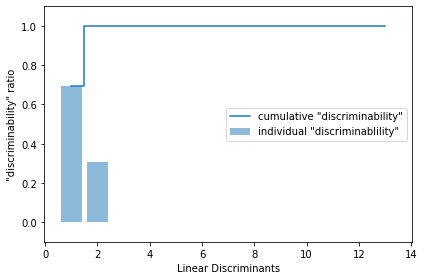

In [69]:
tot = sum(eigen_vals.real)
discr = [(i/tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1,14),discr,alpha=0.5,align='center',label='individual "discriminablility"')
plt.step(range(1,14),cum_discr,where='mid',label='cumulative "discriminability"')
plt.ylabel('"discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1,1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<b>단계 6) 고윳값이 가장 큰 k개의 고유 벡터를 선택하여 $d$x$k$ 차원의 변환행렬 $W$를 구성한다. 이 행렬의 열이 고유 벡터다.</b>

In [70]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,eigen_pairs[1][1][:,np.newaxis].real))

In [71]:
print("행렬 W:\n",w)

행렬 W:
 [[-0.1182 -0.3453]
 [ 0.0539 -0.1989]
 [ 0.0132 -0.2756]
 [ 0.1466  0.2761]
 [-0.0116 -0.0369]
 [ 0.1856  0.071 ]
 [-0.7472  0.26  ]
 [-0.0529  0.057 ]
 [ 0.0097  0.1543]
 [ 0.2747 -0.2725]
 [-0.0896  0.2394]
 [-0.3498  0.0048]
 [-0.3998 -0.6756]]


<b>단계 7) 변환 행렬 $W$를 사용하여 샘플을 새로운 특성 부분 공간으로 투영한다.</b>

$$X'=XW$$

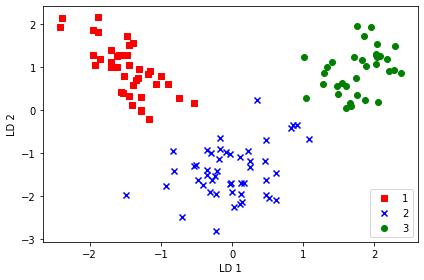

In [74]:
X_train_lda = X_train_std.dot(w)
colors = ['r','b','g']
markers = ['s','x','o']
for l, c, m in zip(np.unique(y_train),colors,markers):
    plt.scatter(X_train_lda[y_train == l,0],X_train_lda[y_train==l,1]*(-1),c=c,label=l,marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

### 사이킷런의 LDA

In [75]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA#사이킷런의 LDA 클래스
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std,y_train)

<ipython-input-41-6e4e2590a161>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.6,c=cmap.colors[idx],edgecolor='black',marker=markers[idx],label=cl)


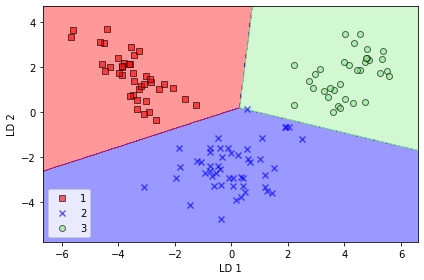

In [76]:
#LDA로 변환한 저차원 데이터셋에 로지스틱 회귀 분류기가 잘 작동하는지
lr = LogisticRegression(solver='liblinear',multi_class='auto')
lr = lr.fit(X_train_lda,y_train)
plot_decision_regions(X_train_lda,y_train,classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()#클래스 2의 샘플 하나 분류 실패

<ipython-input-41-6e4e2590a161>:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.6,c=cmap.colors[idx],edgecolor='black',marker=markers[idx],label=cl)


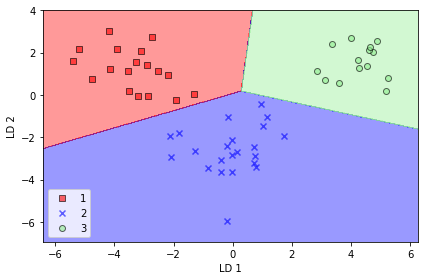

In [77]:
#테스트 세트의 결과
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()#완벽하게 분류

### 커널 PCA
커널 PCA를 사용하여 선형적으로 구분되지 않는 데이터를 선형 분류기에 접합합 새로운 저차원 부분 공간으로 변환

### 커널 함수와 커널 트릭
[비선형 매핑 함수: 더 큰 차원의 특성 공간에 매핑]
$$\phi: \mathbb{R}^{d} \rightarrow \mathbb{R}^{k} (k >> d)$$

$$x = [x_1,x_2]^{T}$$

$$\downarrow \phi (비선형매핑)$$

$$z=[x_1^2,\sqrt{2x_1x_2},x_2^2]^T (고차원)$$

<br>
특성 k와 j의 공분산
$$\sigma_{jk} = \frac{1}{n} \sum_{i=1}^{n}(x_j^{(i)} - \mu_j)(x_k^{(i)} - \mu_k)$$

<br>
$mu_j$=0, $mu_k$=0처럼 특성 평균을 0에 맞춤

$$\sigma_{jk} = \frac{1}{n}\sum_{i=1}^{n} x_j^{(i)}{x_k^{(i)}}^T $$

<br>
공분산 행렬

$$\sum = \frac{1}{n}\sum_{i=1}^{n} x^{(i)}{x^{(i)}}^T $$

<br>
베른하르트 슐코프는 이 방식을 일반화하여 $\phi$를 통한 비선형 특성 조합으로 원본 특성 공간의 샘플 사이의 점곱을 대체

$$\sum = \frac{1}{n}\sum_{i=1}^{n} \phi(x^{(i)})\phi({x^{(i)}})^T $$

<br>
이 공분산 행렬에서 고유 벡터(주성분)를 얻기 위해:

$$\sum v = \lambda v$$
$$\Rightarrow \frac{1}{n}\sum_{i=1}^{n} \phi(x^{(i)})\phi({x^{(i)}})^T v = \lambda v$$
$$\Rightarrow v = \frac{1}{n\lambda}\sum_{i=1}^{n} \phi(x^{(i)})\phi({x^{(i)}})^T v = \sum_{i=1}^{n} a^{(i)}\phi({x^{(i)}})$$

$K$: 유사도(커널) 행렬
$$K = \phi(X)\phi(X)^{T}$$

커널 함수 $K$

$$K(x^{(i)},x^{(j)}) = {\phi(x^{(i)})}^T\phi(x^{(j)})$$

방사 기저 함수(Radical Basis Function, RBF), 가우시안 커널

$$K(x^{i},x^{j}) = exp\Big(-\frac{{\parallel x^{i} - x^{j}\parallel}^2}{2\sigma^2} \Big)$$

$$ \gamma = \frac{1}{2\sigma^2}$$

$$K(x^{i},x^{j}) = exp\Big(-\gamma{\parallel x^{i} - x^{j}\parallel}^2\Big)$$

### 파이썬으로 커널 PCA 구현

In [94]:
from scipy.spatial.distance import pdist, squareform
from numpy import exp
from scipy.linalg import eigh
import numpy as np
import pandas as pd

def rbf_kernel_pca(X, gamma, n_components):#RBF 커널 구현
    
    #MxN 차원의 데이터셋에서 샘플 간의 유클리디안 거리의 제곱을 계산
    sq_dists = pdist(X, 'sqeuclidean')#샘플 간의 유클리디안 거리의 제곱을 계산
    mat_sq_dists = squareform(sq_dists)#샘플 간의 거리->정방대칭행렬로 변환
    K = exp(-gamma*mat_sq_dists)#커널 행렬 계산
    
    #커널 행렬을 중앙에 맞춤
    N = K.shape[0]
    one_n= np.ones((N,N))/N
    K = K-one_n.dot(K)-K.dot(one_n)+one_n.dot(K).dot(one_n)#커널 행렬 중앙에
    
    #중앙에 맞춰진 커널 행렬의 고윳값과 고유벡터를 구함
    #scipy.linalg.eigh 함수는 오름차순으로 반환
    eigvals, eigvecs = eigh(K)
    eigvals, eigvecs = eigvals[::-1], eigvecs[:,::-1]#고윳값, 고유벡터 선택
    
    #최상위 k개의 고유벡터 선택(투영 결과)
    X_pc = np.column_stack([eigvecs[:,i] for i in range(n_components)])#최상위 k개 고유벡터 선택
    
    return X_pc


#### 예제 1: 반달 모양 구분하기

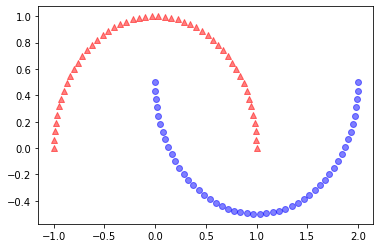

In [81]:
from sklearn.datasets import make_moons#반달모양
X,y = make_moons(n_samples=100,random_state=123)
plt.scatter(X[y==0,0],X[y==0,1],
           color = 'red',marker='^',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],color='blue', marker='o',alpha=0.5)
plt.show()

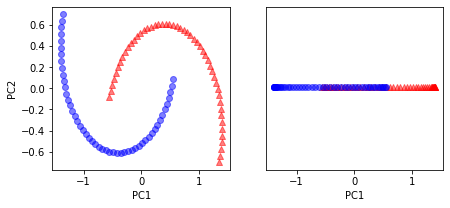

In [88]:
#기본 PCA의 주성분에 데이터셋 투영 결과
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_spca[y==0,0],X_spca[y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X_spca[y==1,0],X_spca[y==1,1],color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_spca[y==0,0],np.zeros((50,1))+0.02,color='red',marker='^',alpha=0.5)
ax[1].scatter(X_spca[y==1,0],np.zeros((50,1))+0.02,color='blue',marker='o',alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()#구분 불가(선형적으로 구분 불가)

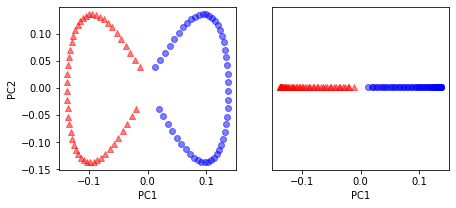

In [96]:
#RBF 커널 PCA로 투영한 경우
X_kpca = rbf_kernel_pca(X,gamma=15,n_components=2)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_kpca[y==0,0],np.zeros((50,1))+0.02,color='red',marker='^',alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((50,1))+0.02,color='blue',marker='o',alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()#적합(선형적으로 구분 가능)

#### 예제 2: 동심원 분리하기

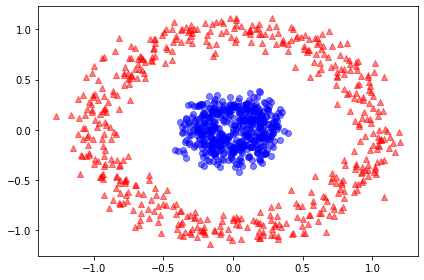

In [97]:
from sklearn.datasets import make_circles#동심원
X,y = make_circles(n_samples=1000,random_state=123,noise=0.1,factor=0.2)
plt.scatter(X[y==0,0],X[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X[y==1,0],X[y==1,1],color='blue',marker='o',alpha=0.5)
plt.tight_layout()
plt.show()

In [105]:
#기본 PCA의 경우
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

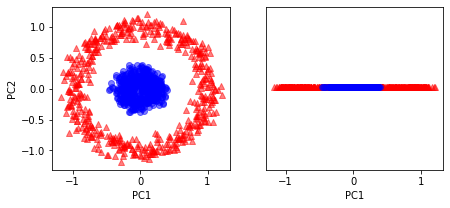

In [107]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_spca[y==0,0],X_spca[y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X_spca[y==1,0],X_spca[y==1,1],color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_spca[y==0,0],np.zeros((500,1))+0.02,color='red',marker='^',alpha=0.5)
ax[1].scatter(X_spca[y==1,0],np.zeros((500,1))+0.02,color='blue',marker='o',alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()#선형 분류기에 부적합한 결과

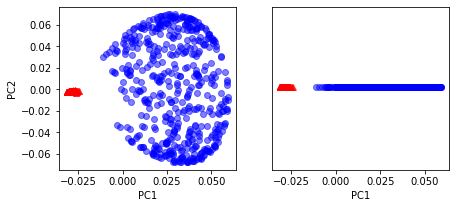

In [109]:
#RBF 커널 PCA의 경우
X_kpca = rbf_kernel_pca(X,gamma=15,n_components=2)
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(7,3))
ax[0].scatter(X_kpca[y==0,0],X_kpca[y==0,1],color='red',marker='^',alpha=0.5)
ax[0].scatter(X_kpca[y==1,0],X_kpca[y==1,1],color='blue',marker='o',alpha=0.5)
ax[1].scatter(X_kpca[y==0,0],np.zeros((500,1))+0.02,color='red',marker='^',alpha=0.5)
ax[1].scatter(X_kpca[y==1,0],np.zeros((500,1))+0.02,color='blue',marker='o',alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()#적합(선형적으로 구분 가능)

### 새로운 데이터 포인트 투영

In [110]:
from scipy.spatial.distance import pdist, squareform
from numpy import exp
from scipy.linalg import eigh
import numpy as np

In [111]:
def rbf_kernel_pca(X,gamma,n_components):
    #MxN 차원의 데이터셋에서 샘플 간의 유클리디안 거리의 제곱을 계산
    sq_dists = pdist(X,'sqeuclidean')
    
    #샘플 간의 거리를 정방 대칭 행렬로 변환
    mat_sq_dists = squareform(sq_dists)
    
    #커널 행렬을 계산
    K = exp(-gamma*mat_sq_dists)
    
    #커널 행렬을 증앙에 맞춤
    N = K.shape[0]
    one_n = np.ones((N,N))/N
    K = K-one_n.dot(K)-K.dot(one_n)+one_n.dot(K).dot(one_n)
    
    #중앙에 맞춰진 커널 행렬의 고유값과 고유벡터를 구함
    #scipy.linalg.eigh 함수는 오름차순으로 반환
    eigvals,eigvecs = eigh(K)
    eigvals,eigvecs = eigvals[::-1],eigvecs[:,::-1]
    
    #최상위 k개의 고유 벡터를 선택(투영 결과)
    alphas = np.column_stack([eigvecs[:,i] for i in range(n_components)])
    
    #고유 벡터에 상응하는 고윳값을 선택한다
    lambdas = [eigvals[i] for i in range(n_components)]#고윳값
    
    return alphas, lambdas#고유벡터, 고윳값

In [113]:
X,y = make_moons(n_samples=100, random_state=123)
alphas, lambdas = rbf_kernel_pca(X,gamma=15,n_components=1)
x_new = X[25]#새로운 데이터포인트
x_new

array([1.8713, 0.0093])

In [114]:
x_proj = alphas[25]#원본 투영
x_proj

array([0.0788])

In [122]:
def project_x(x_new, X, gamma, alphas, lambdas):#새로운 부분 공간으로 투영
    pair_dist = np.array([np.sum((x_new-row)**2)for row in X])
    k = np.exp(-gamma*pair_dist)
    return k.dot(alphas/lambdas)

In [123]:
#새로운 데이터 샘플 투영
x_reproj = project_x(x_new,X,gamma=15, alphas=alphas,lambdas = lambdas)
x_reproj

array([0.0788])

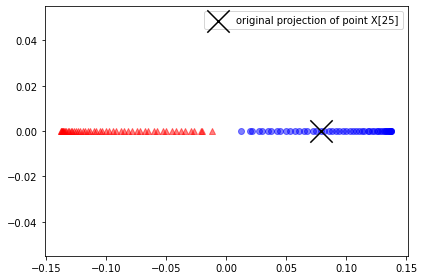

In [125]:
plt.scatter(alphas[y==0,0],np.zeros((50)),color='red',marker='^',alpha=0.5)
plt.scatter(alphas[y==1,0],np.zeros((50)),color='blue',marker='o',alpha=0.5)
plt.scatter(x_proj,0,color='black',label='original projection of point X[25]',marker='x',s=500)#x'
plt.legend(scatterpoints = 1)
plt.tight_layout()
plt.show()#주성분에 투영된 새로운 포인트

### 사이킷런의 커널 PCA

In [126]:
from sklearn.decomposition import KernelPCA
X,y = make_moons(n_samples=100, random_state=123)

In [127]:
scikit_kpca = KernelPCA(n_components=2, kernel='rbf',gamma=15)
X_skernpca = scikit_kpca.fit_transform(X)

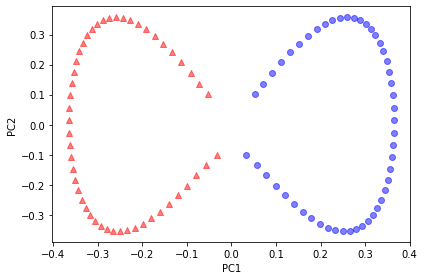

In [128]:
plt.scatter(X_skernpca[y==0,0],X_skernpca[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X_skernpca[y==1,0],X_skernpca[y==1,1],color='blue',marker='o',alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()#사이킷런의 커널 PCA

#### 다른 커널들 시도

원본: 반달모양 데이터

In [131]:
scikit_kpca = KernelPCA(n_components=2, kernel='linear',gamma=15)#linear
X_skernpca = scikit_kpca.fit_transform(X)

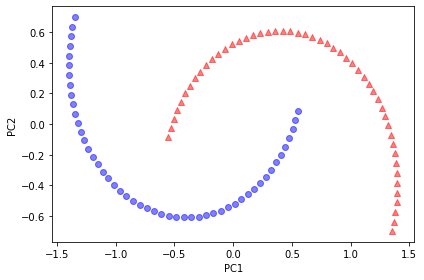

In [132]:
plt.scatter(X_skernpca[y==0,0],X_skernpca[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X_skernpca[y==1,0],X_skernpca[y==1,1],color='blue',marker='o',alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()#사이킷런의 커널 PCA(원본 출력됨)

In [133]:
scikit_kpca = KernelPCA(n_components=2, kernel='poly',gamma=15)#poly
X_skernpca = scikit_kpca.fit_transform(X)

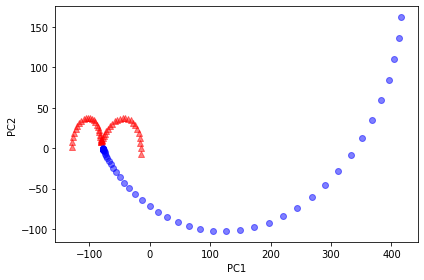

In [134]:
plt.scatter(X_skernpca[y==0,0],X_skernpca[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X_skernpca[y==1,0],X_skernpca[y==1,1],color='blue',marker='o',alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()#사이킷런의 커널 PCA

In [137]:
scikit_kpca = KernelPCA(n_components=2, kernel='sigmoid',gamma=15)#sigmoid
X_skernpca = scikit_kpca.fit_transform(X)

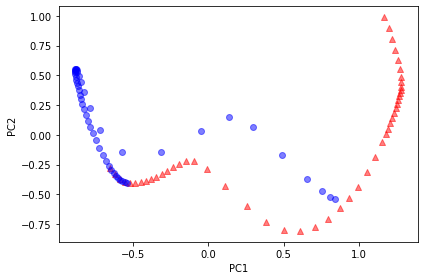

In [138]:
plt.scatter(X_skernpca[y==0,0],X_skernpca[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X_skernpca[y==1,0],X_skernpca[y==1,1],color='blue',marker='o',alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()#사이킷런의 커널 PCA

In [140]:
scikit_kpca = KernelPCA(n_components=2, kernel='cosine',gamma=15)#cosine
X_skernpca = scikit_kpca.fit_transform(X)

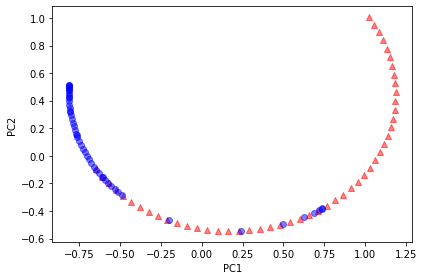

In [141]:
plt.scatter(X_skernpca[y==0,0],X_skernpca[y==0,1],color='red',marker='^',alpha=0.5)
plt.scatter(X_skernpca[y==1,0],X_skernpca[y==1,1],color='blue',marker='o',alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()#사이킷런의 커널 PCA